In [1]:
import pandas as pd

data = pd.read_csv("insurance.csv")
print(data.head())
print(data.columns)
data.info()


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

numeric_cols, categorical_cols


(Index(['age', 'bmi', 'children', 'charges'], dtype='object'),
 Index(['sex', 'smoker', 'region'], dtype='object'))

In [3]:
data['sex'] = data['sex'].map({'male':1, 'female':0})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})


In [4]:
data = pd.get_dummies(data, columns=['region'], drop_first=True)


In [5]:
from sklearn.preprocessing import StandardScaler

X = data.drop('charges', axis=1)
y = data['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

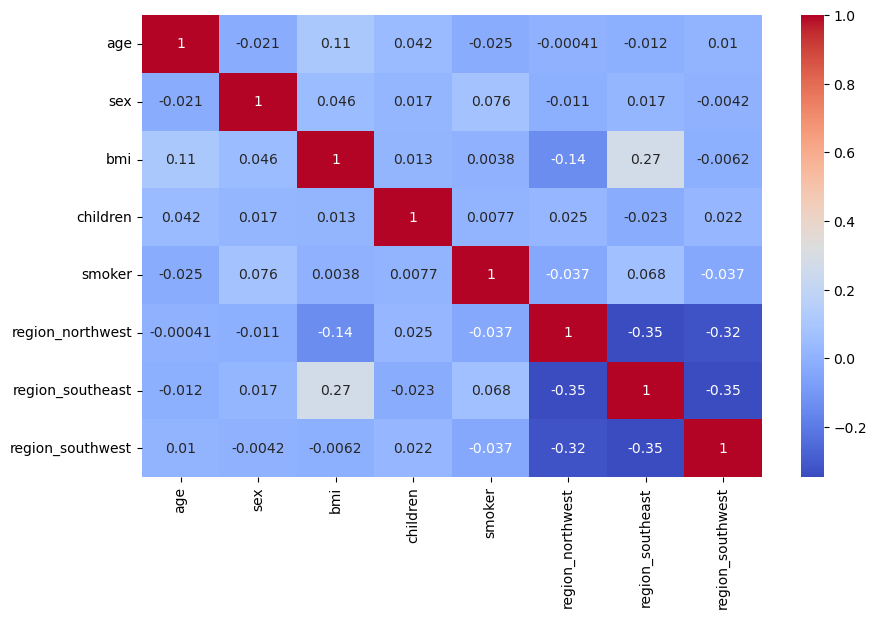

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pd.DataFrame(X_scaled, columns=X.columns).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [7]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_scaled, y)

Ridge()